# Visualización de Felicidad en 2022

Autores : 

    - Gozde Yazganoglu
    
    - Irma Sanchez
    
    - Ignacio Gonzales

### 1. Instalacion de librerías necessarias.

In [5]:
!pip install sweetviz
!pip install streamlit
!pip install geopandas

### 2. Importacion de las librerías.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import altair as alt
import geopandas as gpd
import streamlit as st
import matplotlib.gridspec as gs


## 3.Datos

En este trabajo utilizamos 2 datasets. El data set numerico de Felicidad viene de Kaggle. Para acompañar bien tal dataset, Elegimos tambien utilizar datos de paises. En nuestro trabajo elegimos paises de Europa. El geodata viene de sitioweb de efrainmaps.

Ahora descubrimos un poco.

In [13]:
#Datos Numericos

data = pd.read_csv('../data/World Happiness Report 2022.csv')
#https://www.kaggle.com/code/swetarajsinha/happiness-ranking-2022-hierarchical-clustering
data 

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [9]:
#geodata
geodata = gpd.read_file('../data/Europe.shp')
geodata.columns = ['Country', 'Country_orig','geometry']
geodata.head()

#https://www.efrainmaps.es/english-version/free-downloads/europe/

,Country,Country_orig,geometry
0,Albania,Shqipëria,"MULTIPOLYGON (((19.50115 40.96230, 19.50563 40..."
1,Andorra,Andorra,"POLYGON ((1.43992 42.60649, 1.45041 42.60596, ..."
2,Austria,Österreich,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
3,Belgium,België / Belgique,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
4,Bosnia Herzegovina,Bosna i Hercegovina,"POLYGON ((19.22947 43.53458, 19.22925 43.53597..."


Text(0.5, 1.0, 'Test of Europe Map')

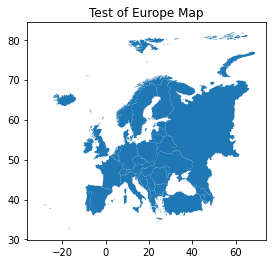

In [53]:
# Agregar datos a nivel provincia usando la función `dissolve`. Es el equivalente a `groupby` de pandas pero sobre
# datos espaciales
(geodata
    .dissolve(by='Country')
    .plot()
)

plt.title('Test of Europe Map')

In [ ]:
Finalmente podemos explorar los datos numericos tambien utilizando un API con ayuda de librería sweetviz. 

In [22]:
analyze_report=sv.analyze(data)
analyze_report.show_html('../data/primer_analisis.html')

### 4.Grafos 

 - > Visualizacion de 'Happiness Score' en todos los paises. 


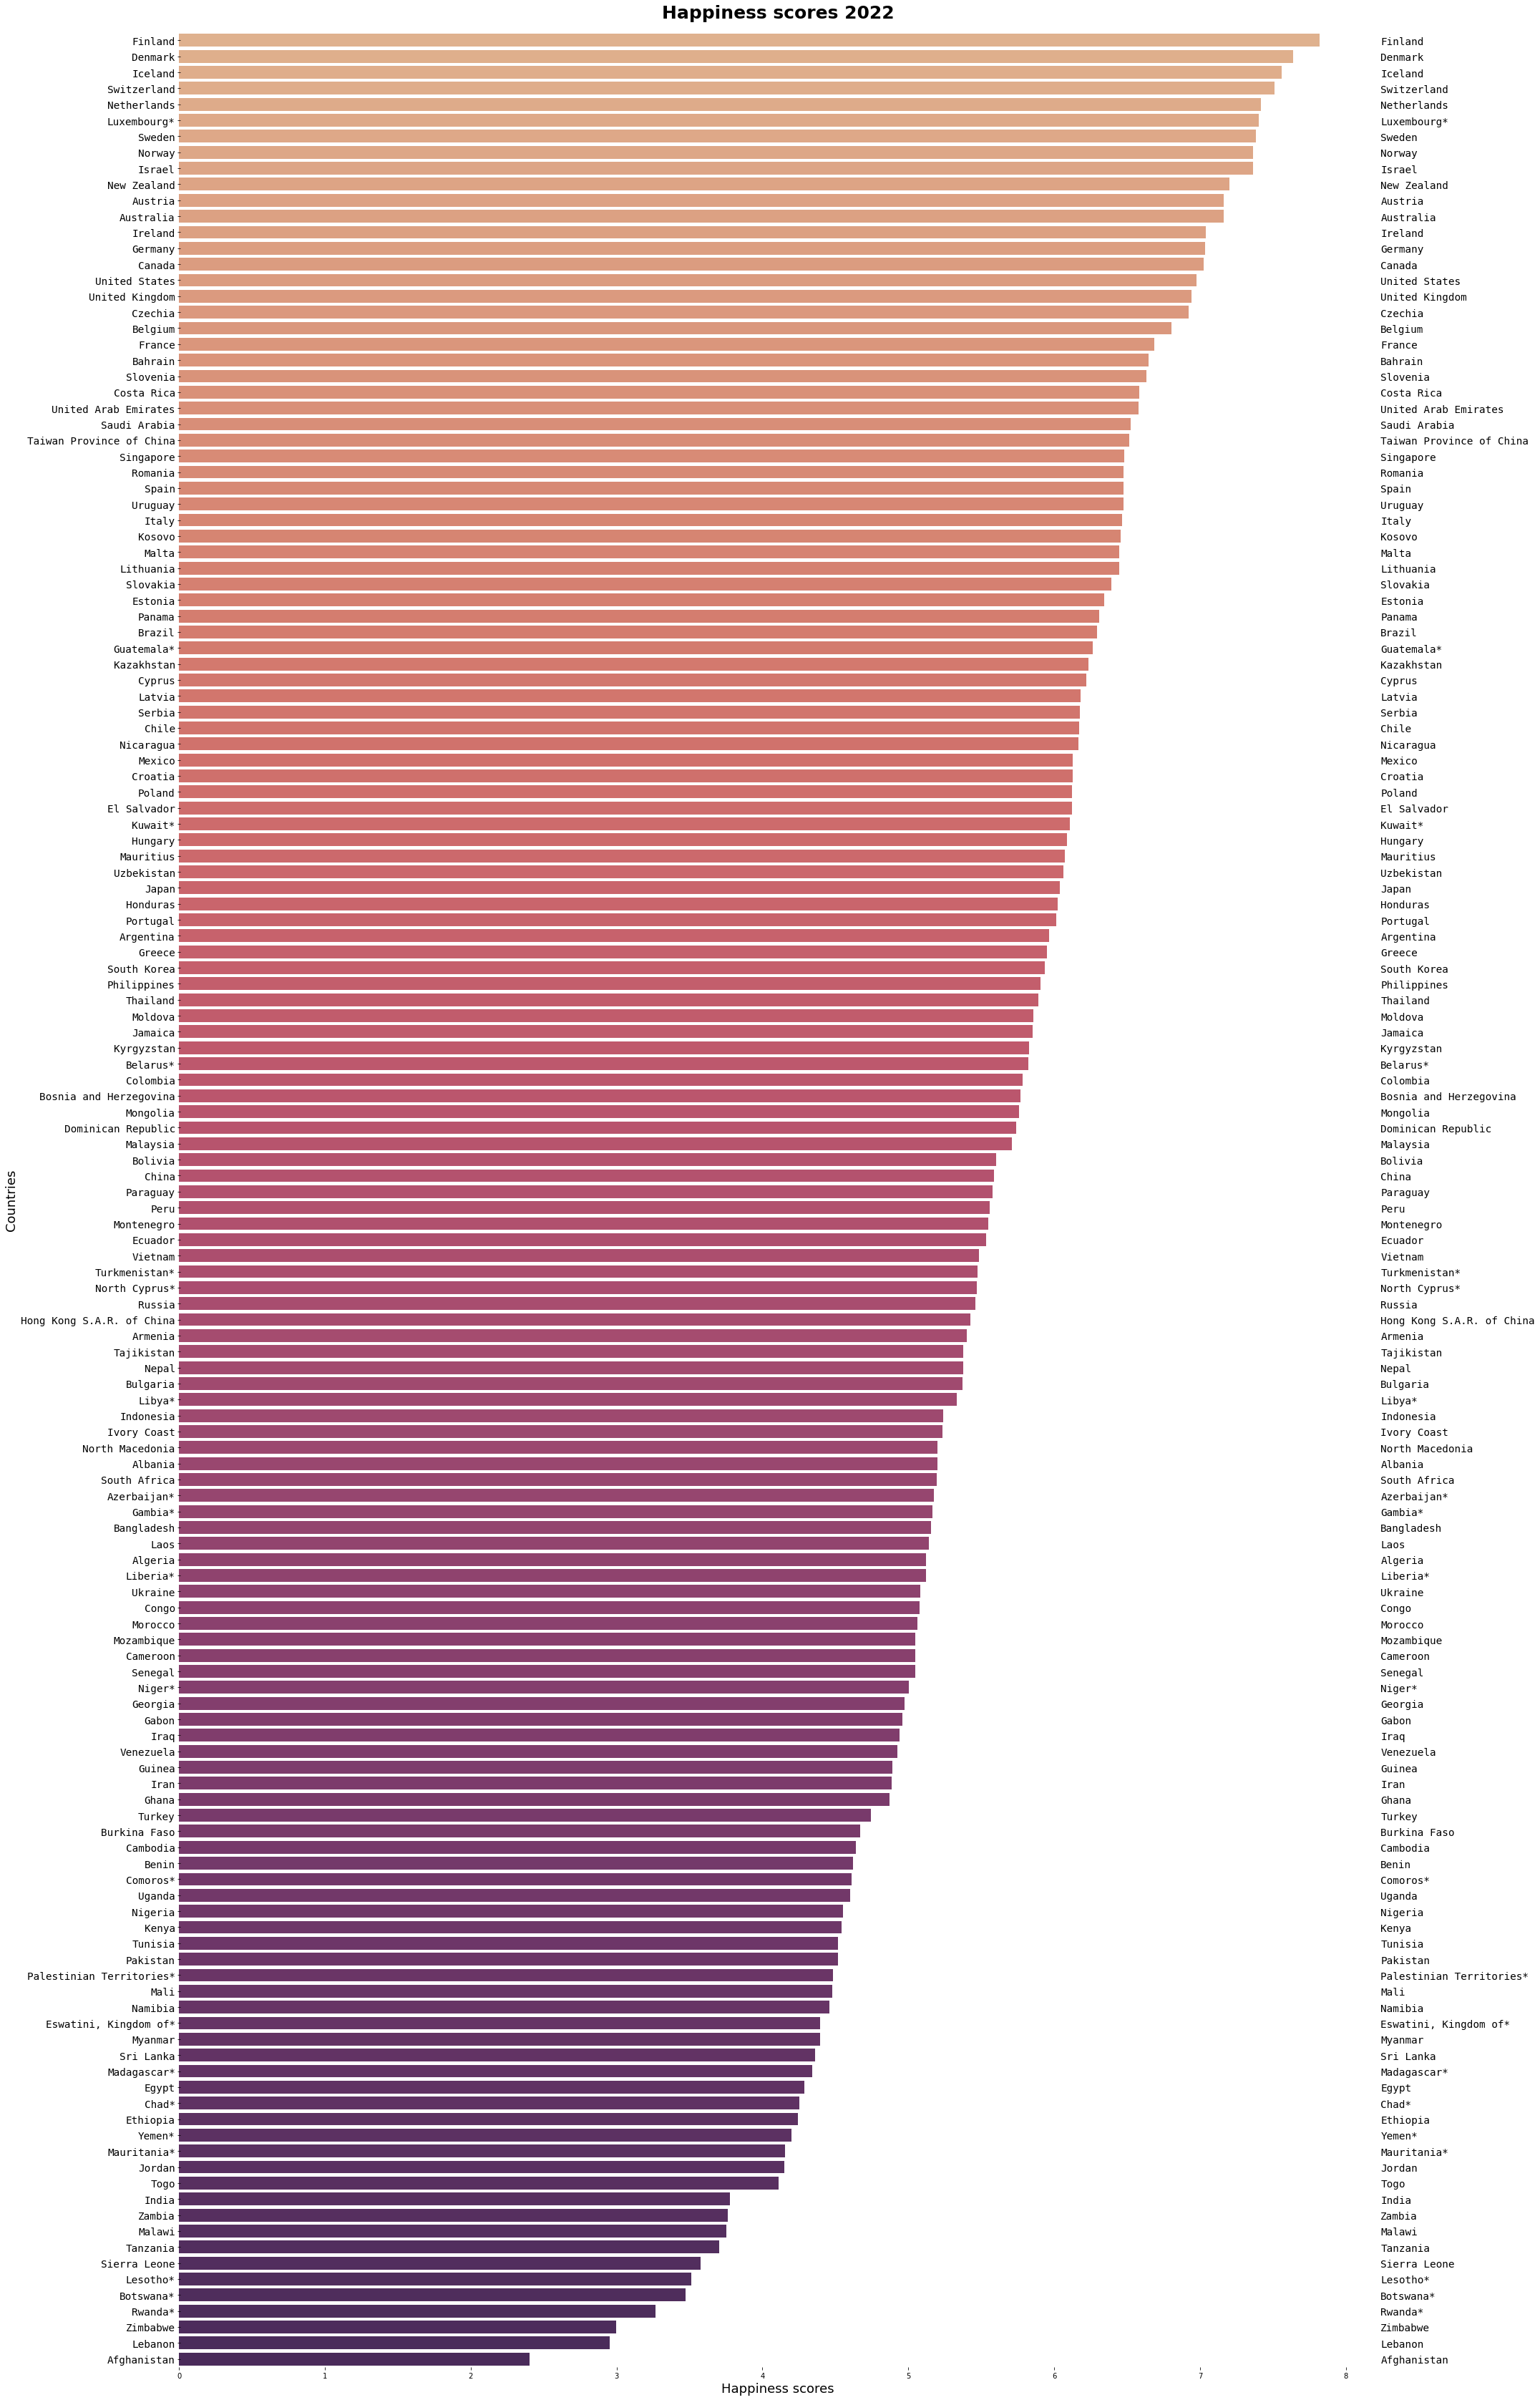

In [16]:
#setting plot styles
bodyFont = {
    'fontfamily': 'monospace',
    'fontsize': '25',
    'fontweight': 'demi',
    'picker': True
}

titleFont = {
    'fontfamily': 'sans-serif',
    'fontsize': '25',
    'fontweight': 'bold',
    'picker': True
}


fig = plt.figure(figsize=(30, 60))
sns.barplot(data=data, x='Happiness score', y='Country', palette="flare")


#checking that the axes is correct to customize visuals with matplotlib
ax = plt.gca()
#print(id(ax) == id(plt.gca()))

#axes customization
ax.set_title('Happiness scores 2022', fontdict=titleFont, pad=20)
ax.set_xlabel('Happiness scores', fontdict={'fontsize': '18'})
ax.set_ylabel('Countries', fontdict={'fontsize': '18'})
ax.tick_params(axis='y', direction='inout', labelsize='x-large', labelright=True)
ax.set_yticklabels(labels=data['Country'], fontdict={'fontfamily': 'monospace'})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
     

 - > Para ver mejor podemos ver los 5 mejores y 5 peores.

In [ ]:
# Top 5 and bottom 5 countries in 2022 report
fig= plt.figure(figsize=(15,8))
g=gs.GridSpec(ncols=1, nrows=2, figure=fig)
plt.suptitle("Top 5 and Bottom 5 countries in Happiness index 2022", family='Sans-Serif', weight='bold', size=20)
ax1=plt.subplot(g[0,0])

top_5=data.head(5)
bot_5=data.tail(5)
ax1=sns.barplot(data=top_5, x=top_5['Happiness score'],y=top_5['Country'], color='green')
#ax1.set_xlabel('')
ax1.xaxis.set_visible(False)
ax1.annotate("Top 5 countries in Happiness index",xy=(8,2), family='Sans-Serif', weight='bold', size=12)
ax2=plt.subplot(g[1,0], sharex=ax1)
ax2=sns.barplot(data=bot_5, x=bot_5['Happiness score'],y=bot_5['Country'], color='red')
ax2.annotate("Bottom 5 countries in Happiness index",xy=(8,2), family='Sans-Serif', weight='bold', size=12)
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)

In [56]:
selector=alt.selection_multi(fields =['Happiness score'], bind='legend')

base_scat = alt.Chart(data).mark_point().encode(
    x ='Explained by: GDP per capita:Q',
    y ='Happiness score:Q',
    opacity = alt.condition(selector, alt.value(1), alt.value(0.2)),
    tooltip = ['Country:N'],
    
).add_selection(
    selector
).interactive()

alt.hconcat(
    base_scat.encode(x='Explained by: GDP per capita:Q').properties(title='Happiness-GDP per Capita'),
    
)


alt.HConcatChart(...)

In [27]:
selector=alt.selection_multi(fields =['Happiness score'], bind='legend')

base_scat = alt.Chart(data).mark_point().encode(
    y='Happiness score:Q',
    x='Explained by: Perceptions of corruption:Q',
    opacity = alt.condition(selector, alt.value(1), alt.value(0.2)),
    tooltip = ['Country:N'],
    
).add_selection(
    selector
).interactive()

alt.hconcat(
    base_scat.encode(x='Explained by: Perceptions of corruption:Q').properties(title='Happiness-Corruption'),
    
)


alt.HConcatChart(...)

Para entender mejor los variables 'Generosity' y 'Dystopia' mejor miramos en el gráfico.

In [47]:
data_dist_generosity= data[['Dystopia (1.83) + residual', 'Explained by: Generosity','RANK']]

Text(0.5, 1.0, 'Dystopia, Generosity vs Rank')

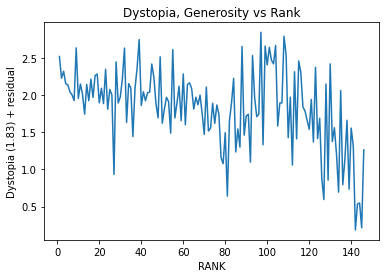

In [51]:
#sns.lineplot(data=data_dist_generosity, x=top_5['Happiness score'],y=top_5['Country'])
ax1=sns.lineplot(data=data_dist_generosity, 
                 x=data_dist_generosity['RANK'],
                 y=data_dist_generosity['Dystopia (1.83) + residual'])
plt.title('Dystopia vs Rank')

In [ ]:
ax1=sns.lineplot(data=data_dist_generosity, 
                 x=data_dist_generosity['RANK'],
                 y=data_dist_generosity['Explained by: Generosity'])
plt.title('Generosity vs Rank')

 - > Mapas de Felicidad

Text(0.5, 1.0, 'Happiness in Europe')

<Figure size 2880x2160 with 0 Axes>

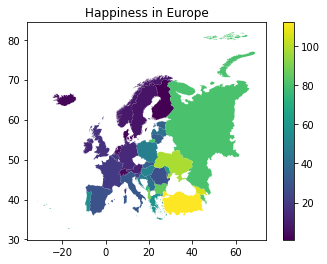

In [21]:


# El dataframe con los datos tiene que ir primero para no perder las propiedades de geopandas


(geodata
    .dissolve(by='Country')
    .merge(data, on='Country', how='left')
    .plot('RANK', legend=True)
    
 
)

plt.title('Happiness in Europe')

Text(0.5, 1.0, 'Corruption in Europe')

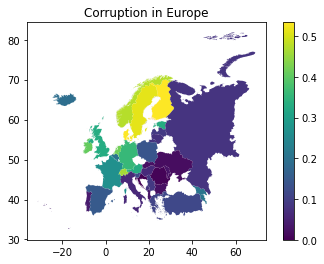

In [25]:
(geodata
    .dissolve(by='Country')
    .merge(data, on='Country', how='left')
    .plot('Explained by: Perceptions of corruption', legend=True)
    
 
)

plt.title('Corruption in Europe')

Text(0.5, 1.0, 'Comparison of Russia and Ucraine')

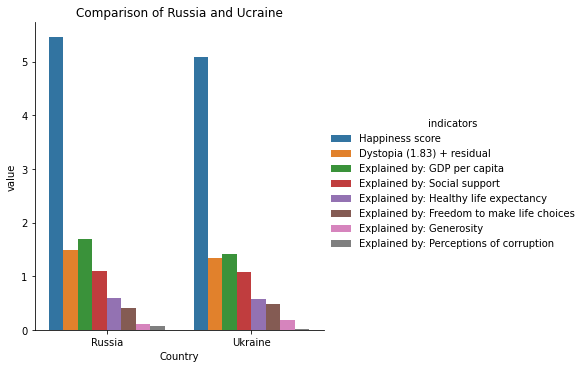

In [61]:
rus_vs_ukr = clean_data[clean_data['Country'].isin(["Russia","Ukraine"])]
rus_vs_ukr

df_melt = pd.melt(rus_vs_ukr, id_vars="Country", var_name="indicators", value_name="value")
df_melt

sns.catplot(x='Country', y='value', hue='indicators', data=df_melt, kind='bar')
plt.title('Comparison of Russia and Ucraine')